# TensorFlow

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [5]:
tf.__version__

'2.7.0'

### Neural Network

In [6]:
model=tf.keras.Sequential([keras.layers.Dense(units=1,input_shape=[1])])

In [8]:
model.compile(optimizer='sgd',loss='mean_squared_error')

In [9]:
xs=np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0],dtype=float)
ys=np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0],dtype=float)

In [10]:
model.fit(xs,ys,epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 204ms/step - loss: 36.5300
Epoch 2/500
1/1 [==============================] - 0s 4ms/step - loss: 29.0807
Epoch 3/500
1/1 [==============================] - 0s 3ms/step - loss: 23.2130
Epoch 4/500
1/1 [==============================] - 0s 2ms/step - loss: 18.5898
Epoch 5/500
1/1 [==============================] - 0s 5ms/step - loss: 14.9457
Epoch 6/500
1/1 [==============================] - 0s 3ms/step - loss: 12.0721
Epoch 7/500
1/1 [==============================] - 0s 2ms/step - loss: 9.8049
Epoch 8/500
1/1 [==============================] - 0s 3ms/step - loss: 8.0148
Epoch 9/500
1/1 [==============================] - 0s 3ms/step - loss: 6.6003
Epoch 10/500
1/1 [==============================] - 0s 2ms/step - loss: 5.4814
Epoch 11/500
1/1 [==============================] - 0s 0s/step - loss: 4.5952
Epoch 12/500
1/1 [==============================] - 0s 4ms/step - loss: 3.8921
Epoch 13/500
1/1 [==============================] - 0s

In [11]:
model.predict([10.0])

array([[18.978127]], dtype=float32)

---

#### Computer vision Neural Network

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fmnist=tf.keras.datasets.fashion_mnist

In [4]:
(x_train,y_train),(x_test,y_test)=fmnist.load_data()

4431872/4422102 [==============================] - 2s 0us/step


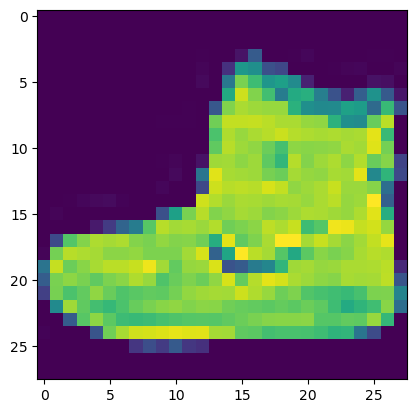

In [5]:
plt.imshow(x_train[0])

In [6]:
x_train=x_train/255
x_test=x_test/255

In [12]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

`Softmax` - takes values and scales them sot that their sum is equal to 1

In [11]:
inputs=np.array([[1.0,3.0,4.0,2.0]])
inputs=tf.convert_to_tensor(inputs)
print(inputs.numpy())

outputs=tf.keras.activations.softmax(inputs)
print(outputs.numpy())

sum=tf.reduce_sum(outputs)
print(sum)

pred=np.argmax(outputs)
print(pred)

[[1. 3. 4. 2.]]
[[0.0320586  0.23688282 0.64391426 0.08714432]]
tf.Tensor(1.0, shape=(), dtype=float64)
2


In [13]:
model.compile(optimizer=tf.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5012 - accuracy: 0.8253
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3813 - accuracy: 0.8637
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3390 - accuracy: 0.8757
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3164 - accuracy: 0.8834
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2963 - accuracy: 0.8911


In [15]:
classifications=model.predict(x_test)
classifications[0]

array([1.9184574e-06, 1.0074925e-07, 7.8489529e-07, 3.6871375e-06,
       3.5058727e-07, 1.1880418e-02, 2.4551056e-05, 5.0590839e-02,
       9.3466064e-05, 9.3740386e-01], dtype=float32)

In [23]:
np.argmax(classifications[0])

9

In [16]:
y_test[0]

9

more neurons model

In [25]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])
model.compile(optimizer=tf.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5)
classifications=model.predict(x_test)
classifications[0]

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4726 - accuracy: 0.8323
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3576 - accuracy: 0.8698
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3198 - accuracy: 0.8832
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2969 - accuracy: 0.8902
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2793 - accuracy: 0.8966


array([1.74382862e-07, 5.03694697e-10, 1.00494965e-07, 3.80642806e-09,
       4.13410906e-09, 2.60294625e-03, 2.58602569e-07, 2.99519468e-02,
       1.22069892e-08, 9.67444539e-01], dtype=float32)

dense layer

In [26]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(512,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])
model.compile(optimizer=tf.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5)
classifications=model.predict(x_test)
classifications[0]

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4755 - accuracy: 0.8282
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3576 - accuracy: 0.8684
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3236 - accuracy: 0.8798
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3004 - accuracy: 0.8870
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2834 - accuracy: 0.8924


array([1.2455727e-06, 6.0806229e-07, 5.6451933e-07, 7.7294533e-07,
       3.2491531e-07, 3.8088073e-03, 1.4007729e-06, 7.2050989e-02,
       8.5427939e-07, 9.2413437e-01], dtype=float32)

skip normalization

In [27]:
(x_train,y_train),(x_test,y_test)=fmnist.load_data()

In [28]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])
model.compile(optimizer=tf.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5)
classifications=model.predict(x_test)
classifications[0]

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 3.7067 - accuracy: 0.7542
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5533 - accuracy: 0.8089
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5227 - accuracy: 0.8198
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5103 - accuracy: 0.8229
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4989 - accuracy: 0.8286


array([5.4037252e-10, 2.6605047e-05, 1.7486521e-15, 8.3569667e-09,
       3.0531709e-14, 4.9027946e-02, 2.2406748e-09, 8.3077848e-02,
       2.2592362e-08, 8.6786753e-01], dtype=float32)

early stopping

`Callbacks` with accuracy

In [34]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        acc=0.88
        if (logs.get('accuracy')>acc):
            print(f'\nAccuracy of {acc}% reached')
            self.model.stop_training=True

callbacks=myCallback()
(x_train,y_train),(x_test,y_test)=fmnist.load_data()
x_train=x_train/255
x_test=x_test/255

model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])
model.compile(optimizer=tf.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5,callbacks=[callbacks])
classifications=model.predict(x_test)
classifications[0]

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4731 - accuracy: 0.8305
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3583 - accuracy: 0.8683
Epoch 3/5
1869/1875 [============================>.] - ETA: 0s - loss: 0.3252 - accuracy: 0.8803
Accuracy of 0.88% reached
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3251 - accuracy: 0.8803


array([1.1115119e-04, 1.2732650e-06, 1.6016238e-05, 2.7235251e-06,
       5.2205578e-05, 3.1276450e-02, 3.1908276e-05, 5.8280900e-02,
       4.7495792e-04, 9.0975243e-01], dtype=float32)

`Callbacks` with loss

In [35]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        loss=0.4
        if (logs.get('loss')<loss):
            print(f'\nLoss is lower than {loss}')
            self.model.stop_training=True

callbacks=myCallback()
(x_train,y_train),(x_test,y_test)=fmnist.load_data()
x_train=x_train/255
x_test=x_test/255

model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(512,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])
model.compile(optimizer=tf.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5,callbacks=[callbacks])
classifications=model.predict(x_test)
classifications[0]

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4770 - accuracy: 0.8296
Epoch 2/5
1873/1875 [============================>.] - ETA: 0s - loss: 0.3586 - accuracy: 0.8686
Loss is 0.4
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3586 - accuracy: 0.8686


array([3.4348490e-05, 6.8944150e-06, 6.8612194e-06, 2.4404055e-06,
       7.4889144e-06, 6.2299963e-02, 5.4048091e-06, 7.9397030e-02,
       8.1569265e-04, 8.5742396e-01], dtype=float32)

---

### Convolutional Neural Network

`Convolution` - makes certain features of an image(line vertical or horizontal lines) more emphasized

`Max polling` - decreases the size of an image

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fmnist=tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=fmnist.load_data()
x_train=x_train/255
x_test=x_test/255

#### Shallow NN

In [6]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])
model.compile(optimizer=tf.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()
model.fit(x_train,y_train,epochs=5)
model.evaluate(x_test,y_test)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5021 - accuracy: 0.8221
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3791 - accuracy: 0.8630
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3368 - accuracy: 0.8781
Epoch 4/5

[0.3458637595176697, 0.8748000264167786]

#### CNN

`Number of convolutions` in advised to be a power of `2`, starting from `32`

In [8]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(optimizer=tf.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()
model.fit(x_train,y_train,epochs=5)
model.evaluate(x_test,y_test)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 800)               0         
                                                                 
 dense_6 (Dense)             (None, 128)              

[0.272408664226532, 0.9039999842643738]

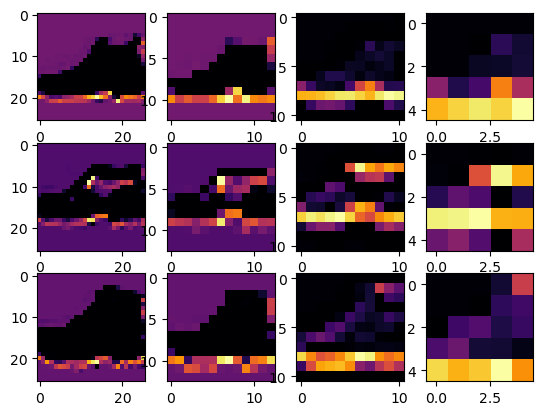

In [11]:
image_1=0
image_2=23
image_3=28
convolution_number=1

layer_outputs=[layer.output for layer in model.layers]
activation_model=tf.keras.models.Model(inputs=model.input,outputs=layer_outputs)

f,axarr=plt.subplots(3,4)
for x in range(0,4):
    f1=activation_model.predict(x_test[image_1].reshape(1,28,28,1))[x]
    axarr[0,x].imshow(f1[0,:,:,convolution_number],cmap='inferno')
    axarr[0,x].grid(False)

    f2=activation_model.predict(x_test[image_2].reshape(1,28,28,1))[x]
    axarr[1,x].imshow(f2[0,:,:,convolution_number],cmap='inferno')
    axarr[1,x].grid(False)

    f3=activation_model.predict(x_test[image_3].reshape(1,28,28,1))[x]
    axarr[2,x].imshow(f3[0,:,:,convolution_number],cmap='inferno')
    axarr[2,x].grid(False)

Original images:

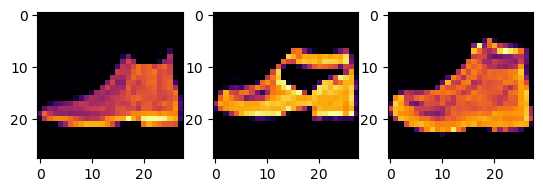

In [21]:
f,axarr=plt.subplots(1,3)
axarr[0].imshow(x_test[0],cmap='inferno')
axarr[1].imshow(x_test[23],cmap='inferno')
axarr[2].imshow(x_test[28],cmap='inferno')

#### Exploring convolutions

In [6]:
from scipy.datasets import ascent
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ascent_image=ascent()

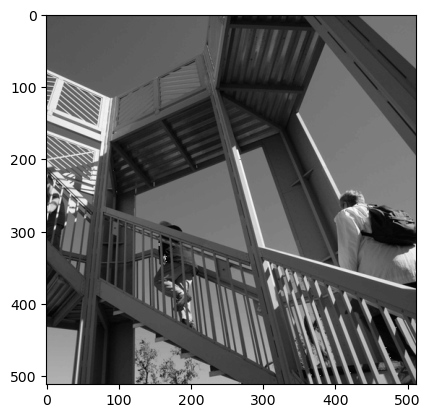

In [5]:
plt.gray()
plt.imshow(ascent_image)

#### Convolution

In [7]:
image_transformed=np.copy(ascent_image)
size_x=image_transformed.shape[0]
size_y=image_transformed.shape[1]

`Filter` - digits shouls add up to 1, if not, add respective wage to mek them do so

In [9]:
filter=[ [0, 1, 0], [1, -4, 1], [0, 1, 0]]
# filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
# filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
weight=1

In [10]:
for x in range(1,size_x-1):
    for y in range(1,size_y-1):
        conv=0.0
        conv=conv+(ascent_image[x-1,y-1]*filter[0][0])
        conv=conv+(ascent_image[x-1,y]*filter[0][1])
        conv=conv+(ascent_image[x-1,y+1]*filter[0][2])
        conv=conv+(ascent_image[x,y-1]*filter[1][0])
        conv=conv+(ascent_image[x,y]*filter[1][1])
        conv=conv+(ascent_image[x,y+1]*filter[1][2])
        conv=conv+(ascent_image[x+1,y-1]*filter[2][0])
        conv=conv+(ascent_image[x+1,y]*filter[2][1])
        conv=conv+(ascent_image[x+1,y+1]*filter[2][2])

        conv=conv*weight
        if conv<0:
            conv=0
        if conv>255:
            conv=255
        image_transformed[x,y]=conv

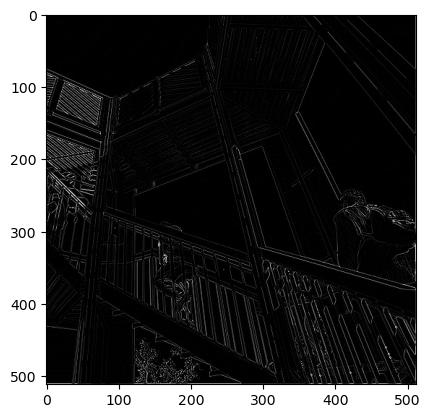

In [11]:
plt.gray()
plt.imshow(image_transformed)

#### MaxPooling

In [12]:
new_x=int(size_x/2)
new_y=int(size_y/2)
new_image=np.zeros((new_x,new_y))

In [14]:
for x in range(0,size_x,2):
    for y in range(0,size_y,2):
        pixels=[]
        pixels.append(image_transformed[x,y])
        pixels.append(image_transformed[x+1,y])
        pixels.append(image_transformed[x,y+1])
        pixels.append(image_transformed[x+1,y+1])

        new_image[int(x/2),int(y/2)]=max(pixels)

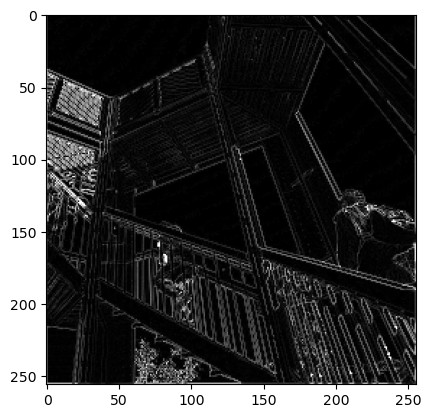

In [15]:
plt.gray()
plt.imshow(new_image)

#### data preprocessing

In [19]:
import tensorflow as tf

In [17]:
def reshape_normalize(images):
    images=images.reshape(60000,28,28,1)
    images=images/255
    return images

In [20]:
(x_train,_),_=tf.keras.datasets.mnist.load_data()

In [ ]:
x_train=reshape_normalize(x_train)
print(f"Maximum pixel value after normalization: {np.max(x_train)}\n")
print(f"Shape of training set after reshaping: {x_train.shape}\n")
print(f"Shape of one image after reshaping: {x_train[0].shape}")

In [22]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        acc=0.88
        if (logs.get('accuracy')>acc):
            print(f'\nAccuracy of {acc}% reached')
            self.model.stop_training=True

callbacks=myCallback()

---

### ConvNet

In [1]:
# https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_horse_dir=os.path.join('./data/horses')
train_human_dir=os.path.join('./data/humans')

In [3]:
train_horse_names=os.listdir(train_horse_dir)
train_human_names=os.listdir(train_human_dir)

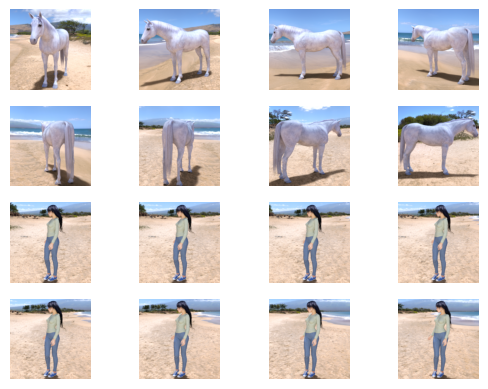

In [4]:
nrows=4
ncols=4
pic_index=0

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [5]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [6]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(learning_rate=0.001),metrics=['accuracy'])

In [7]:
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory('./data/',target_size=(300, 300),batch_size=128,class_mode='binary')

Found 1027 images belonging to 2 classes.


In [8]:
history=model.fit(train_generator,steps_per_epoch=8,epochs=15,verbose=1)

Epoch 1/15
8/8 [==============================] - 36s 4s/step - loss: 0.8784 - accuracy: 0.5918
Epoch 2/15
8/8 [==============================] - 35s 4s/step - loss: 0.9229 - accuracy: 0.5829
Epoch 3/15
8/8 [==============================] - 35s 4s/step - loss: 0.5787 - accuracy: 0.7230
Epoch 4/15
8/8 [==============================] - 39s 5s/step - loss: 0.6503 - accuracy: 0.7910
Epoch 5/15
8/8 [==============================] - 39s 5s/step - loss: 0.3295 - accuracy: 0.8584
Epoch 6/15
8/8 [==============================] - 35s 4s/step - loss: 0.2176 - accuracy: 0.9121
Epoch 7/15
8/8 [==============================] - 35s 4s/step - loss: 0.2023 - accuracy: 0.9210
Epoch 8/15
8/8 [==============================] - 35s 4s/step - loss: 0.1731 - accuracy: 0.9477
Epoch 9/15
8/8 [==============================] - 36s 4s/step - loss: 0.0542 - accuracy: 0.9778
Epoch 10/15
8/8 [==============================] - 35s 5s/step - loss: 0.0688 - accuracy: 0.9766
Epoch 11/15
8/8 [======================

#### Validation

In [ ]:
#train_datagen = ImageDataGenerator(rescale=1/255)
#train_generator = train_datagen.flow_from_directory('./data/',target_size=(300, 300),batch_size=32,class_mode='binary')

In [ ]:
#history=model.fit(train_generator,steps_per_epoch=8,epochs=15,verbose=1validation_data = validation_generator,validation_steps=8)

#### Image processing through layers

C:\Users\pk764\AppData\Local\Temp\ipykernel_14728\846085612.py:45: RuntimeWarning: invalid value encountered in divide
  x /= x.std()
C:\Users\pk764\AppData\Local\Temp\ipykernel_14728\846085612.py:48: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


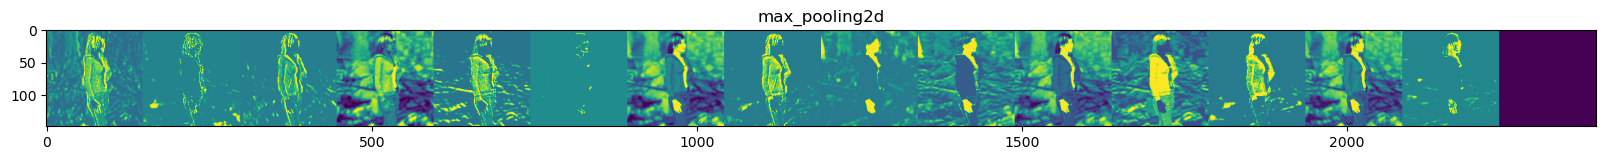

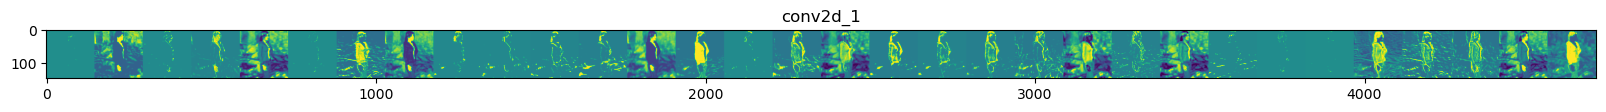

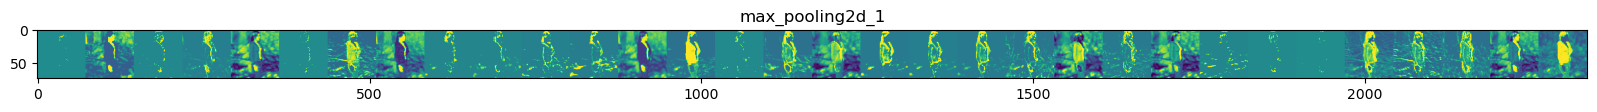

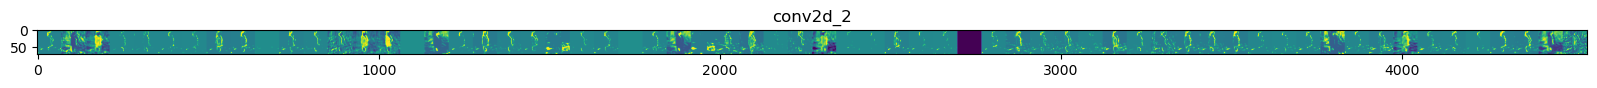

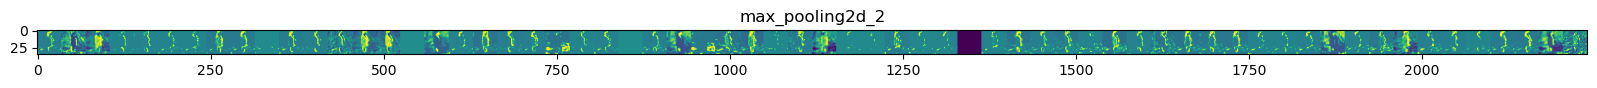

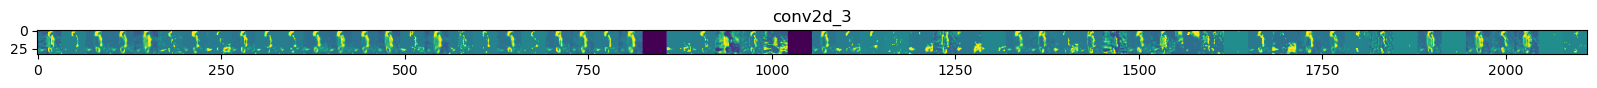

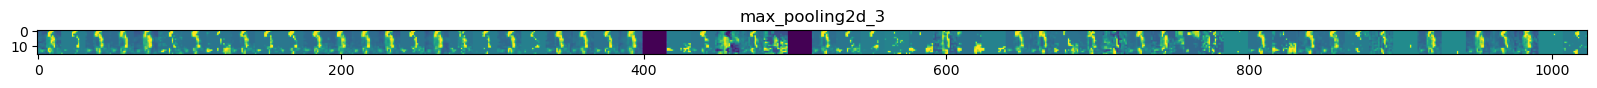

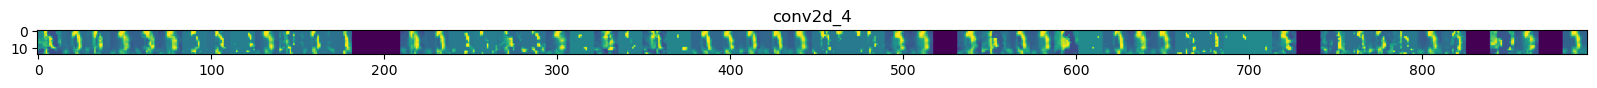

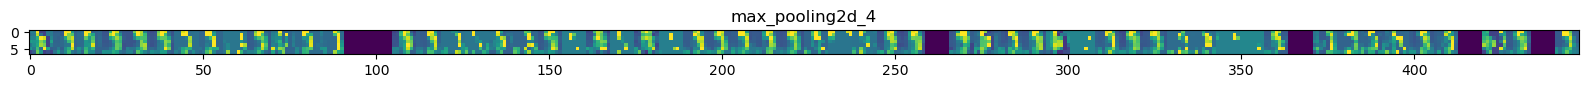

In [10]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
    
      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')